### What is Named Entity Recognition?

Named Entity Recognition or NER for short is a natural language processing task used to identify important named entities in the text -- such as people, places and organizations -- they can even be dates, states, works of art and other categories depending on the libraries and notation you use. 

NER can be used alongside topic identification, or on its own to determine important items in a text or answer basic natural language understanding questions such as who? what? when and where?

### Example of NER

For example, take this piece of text which is from the English Wikipedia article on Albert Einstein. 

<img src="ner.jpg" style="max-width:600px">

The text has been highlighted for different types of named entities that were found using the Stanford NER library. 

You can see the dates, locations, persons and organizations found and extract infomation on the text based on these named entities. 

You can use NER to solve problems like fact extraction as well as which entities are related using computational language models. 

For example, in this text we can see that Einstein has something to do with the United States, Adolf Hitler and Germany. We can also see by token proximity that Betrand Russel and Einstein created the Russel-Einstein manifesto -- all from simple entity highlighting.


###  Using nltk for Named Entity Recognition

For our simple use case, we will use the built-in named entity recognition with NLTK. 

To do so, we take a normal sentence, and preprocess it via tokenization. 

Then, we can tag the sentence for parts of speech. This will add tags for proper nouns, pronouns, adjective, verbs and other part of speech that NLTK uses based on an english grammar. 

In [1]:
import nltk

In [2]:
sentence = '''In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl.'''
tokenized_sent = nltk.word_tokenize(sentence)
print(f'tokenized_sent: {tokenized_sent}', "\n")

tagged_sent = nltk.pos_tag(tokenized_sent)
print(f'tagged_sent: {tagged_sent}')
# tagged_sent[:3]

tokenized_sent: ['In', 'New', 'York', ',', 'I', 'like', 'to', 'ride', 'the', 'Metro', 'to', 'visit', 'MOMA', 'and', 'some', 'restaurants', 'rated', 'well', 'by', 'Ruth', 'Reichl', '.'] 

tagged_sent: [('In', 'IN'), ('New', 'NNP'), ('York', 'NNP'), (',', ','), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('ride', 'VB'), ('the', 'DT'), ('Metro', 'NNP'), ('to', 'TO'), ('visit', 'VB'), ('MOMA', 'NNP'), ('and', 'CC'), ('some', 'DT'), ('restaurants', 'NNS'), ('rated', 'VBN'), ('well', 'RB'), ('by', 'IN'), ('Ruth', 'NNP'), ('Reichl', 'NNP'), ('.', '.')]


When we take a look at the tags, we see New and York are tagged NNP which is the tag for a proper noun, singular.

In [3]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


###  nltk's ne_chunk()

Then we pass this tagged sentence into the ne_chunk function, or named entity chunk, which will return the sentence as a tree. NLTK Tree's might look a bit different than trees you might use in other libraries, but they do have leaves and subtrees representing more complex grammar.

This tree shows the named entities tagged as their own chunks such as GPE or geopolitical entity for New York, or MOMA and Metro as organizations. 

It also identifies Ruth Reichl as a person. It does so without consulting a knowledge base, like wikipedia, but instead uses trained statistical and grammatical parsers.

In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize

## EX: NER with NLTK

You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use nltk to find the named entities in this article.

What might the article be about, given the names you found?

In [23]:
with open("uber_apple.txt", 'r',  encoding="utf8") as f:
    article1 = f.read()
#print(article)

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article1)
#sentences

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]
#token_sentences

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
#pos_sentences

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = False)
#chunked_sentences

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    #print(f'sent: {sent} \n =========')
    for chunk in sent:
        #print(f'chunk 1: {chunk} \n =========')
        if hasattr(chunk, "label"):
            print(chunk)
            #print(f'chunk 2: {chunk} \n =========')
#print(chunk)

(GPE Beyond/NN)
(PERSON Apple/NNP)
(PERSON Travis/NNP Kalanick/NNP)
(PERSON Tim/NNP Cook/NNP)
(PERSON Apple/NNP)
(PERSON Silicon/NNP)
(PERSON Valley/NNP)
(ORGANIZATION CEO/NNP)
(GPE Yahoo/NNP)
(PERSON Marissa/NNP Mayer/NNP)


###  What is SpaCy?

SpaCy is a NLP library similar to Gensim, but with different implementations, including a particular focus on creating NLP pipelines to generate models and corpora. SpaCy is open-source and has several extra libraries and tools built by the same team, including Displacy - a visualization tool for viewing parse trees. For example, if we use the displacy entity recognition visualizer which has a live demo online. https://explosion.ai/demos/displacy-ent/

### SpaCy NER

To start using spacy for Named entity recognition, we must first install it and download all the appropriate pre-trained word vectors. You can also train vectors yourself and load them; but the pretrained ones let us get started immediately. 

<img src="sp.jpg" style="max-width:600px">

We can load those into an object, NLP, which functions similarly to our Gensim dictionary and corpus. It has several linked objects, including entity which is an Entity Recognizer object from the pipeline module. This is what is used to find entities in the text. 

Then we load a new document by passing a string into the NLP variable. When the document is loaded, the named entities are stored as a document attribute called ents. We see Spacy properly tagged and identified the three main entities in the sentence. We can also investigate the labels of each entity by using indexing to pick out the first entity and the label_ attribute to see the label for that particular entity. Here we see the label for Berlin is GPE or Geopolitical entity. Spacy has several other language models available, including advanced German and Chinese implementations. It's a great tool especially if you want to build your own extraction and natural language processing pipeline quickly and iteratively.

###  Why use SpaCy for NER?

Why use Spacy for NER? Outside of being able to integrate with the other great Spacy features like easy pipeline creation, it has a different set of entity types and often labels entities differently than nltk. In addition, Spacy comes with informal language corpora, allowing you to more easily find entities in documents like Tweets and chat messages.

In [11]:
import spacy

In [24]:
with open("uber_apple.txt", 'r',  encoding="utf8") as f:
    article1 = f.read()
    
# Instantiate the English model: nlp
nlp = spacy.load("en_core_web_sm")

# Create a new document: doc
doc = nlp(article1)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
ORG Apple
PERSON Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
LOC Silicon Valley’s
NORP democratic
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


In [25]:
with open("articles.txt", 'r',  encoding="utf8") as f:
    article2 = f.read()

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article2)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = False)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    #print(f'sent: {sent} \n =========')
    for chunk in sent:
        #print(f'chunk 1: {chunk} \n =========')
        if hasattr(chunk, "label"):
            print(chunk)

(ORGANIZATION EPA/NNP Image/NNP)
(GPE US/JJ)
(PERSON Uber/NNP)
(ORGANIZATION Reuters/NNPS)
(GPE Portland/NNP)
(GPE Oregon/NNP)
(GPE Greyball/NNP)
(GPE Portland/NNP)
(PERSON Uber/NNP)
(GPE New/NNP York/NNP Times/NNP)
(PERSON Alexa/NNP)
(PERSON Siri/NNP)
(PERSON Rachael/NNP Tatman/NNP)
(LOCATION South/NNP)
(ORGANIZATION New/NNP Zealand/NNP)
(PERSON Tatman/NNP)
(GPE San/NNP Francisco/NNP)
(PERSON Twitter/NNP)
(PERSON Tatman/NNP)
(ORGANIZATION University/NNP)
(GPE Washington/NNP)
(PERSON Virtual/NNP Assistant/NNP Summit/NNP)
(FACILITY Park/NNP Central/NNP Hotel/NNP)
(PERSON Apple/NNP)
(PERSON Siri/NNP)
(PERSON Amazon/NNP)
(PERSON Echo/NNP)
(PERSON Tatman/NNP)
(PERSON Tatman/NNP)
(ORGANIZATION YouTube/NNP)
(GPE Southern/JJ)
(GPE California/NNP)
(GPE South/NNP)
(GPE United/NNP States/NNPS)
(GPE Southern/NNP)
(PERSON Stephen/NNP Scarr/NNP)
(ORGANIZATION CEO/NNP)
(ORGANIZATION eContext/NN)
(PERSON Scarr/NNP)
(ORGANIZATION YouTube/NNP)
(PERSON Amazon/NNP)
(PERSON Alexa/NNP)
(PERSON Alonso/NNP)


In [30]:
with open("articles.txt", 'r',  encoding="utf8") as f:
    article2 = f.read()

# Instantiate the English model: nlp
nlp = spacy.load("en_core_web_sm")

# Create a new document: doc
doc = nlp(article2)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG EPA Image
GPE US
ORG Uber
ORG Reuters
GPE Portland
GPE Oregon
DATE last week
GPE Portland
ORG Uber
DATE April 2015
PERSON Uber
ORG the New York Times
DATE earlier this year
ORG Uber
ORG Alexa
PERSON Siri
PERSON Rachael Tatman
LOC South
GPE New Zealand
ORG Tatman
DATE last week
GPE San Francisco
PRODUCT Twitter
PERSON Tatman
ORG the University of Washington’s
DATE two-day
DATE Friday
FAC the Park Central Hotel
PERSON Deep Learning Summit
CARDINAL about 600
ORG Apple’s Siri
ORG Amazon’s Echo
QUANTITY as little as
CARDINAL two
PERSON Tatman
PERSON Tatman
ORG YouTube
NORP Southern
GPE California
LOC South
GPE the United States
NORP Southern
PERSON Stephen Scarr
ORG Info.com
ORG eContext
PERCENT 20 percent
CARDINAL 1
PERSON Scarr
ORG YouTube
ORG Amazon
ORG Alexa
PERSON Alonso Martinez
PERSON Martinez
WORK_OF_ART Inside Out
CARDINAL two
GPE Emeryville
PERSON Elena Corina Grigore
ORG Yale University’s Social Robotics Lab
PERSON Grigore
ORG Ikea
PERSON Benny Evangelista
ORG San Francisco C

In [6]:
from collections import defaultdict
import matplotlib.pyplot as plt

In [7]:
print(type(chunked_sentences))

<class 'generator'>


## EX : Charting practice

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.

You can use hasattr() to determine if each chunk has a 'label' and then simply use the chunk's .label() method as the dictionary key.

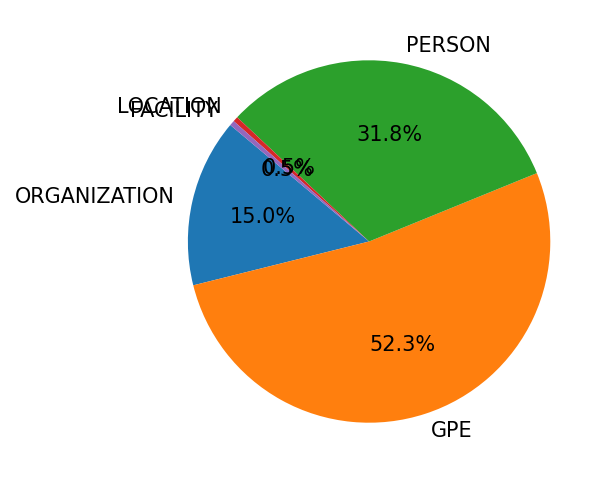

In [31]:
with open("articles.txt", 'r',  encoding="utf8") as f:
    article2 = f.read()

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article2)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = False)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            #print(ner_categories)

# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())
#print(labels)

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]
#print(values)

plt.figure(dpi = 150)
# Create the pie chart
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()